# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents</p>



* **[1.The purpose of the project](#1)**

  - A simple definition of the idea of ​​the project
   
   
* **[2.Data features](#2)**

  - Definition of data features
  
  
* **[3.Importing libraries](#3)**  

   - Recall the most important libraries through which the project is completed
   
   
* **[4.Reading the data 📚](#4)**

   - This is an important step to get to know the data quickly and start organizing ideas
   
   
* **[5.Statistical information and general information about the data 🔍](#5)**

   - Data shape
   
   - Detect empty values
   
   - Statistical understanding of the data
   
   - Know the data types that will be dealt with
   
   - knowing the column names
   
   
* **[6.EDA 📊](#6)**

   - Knowledge of information through data and its representation in graphs
   
   - Know the parts that are not clear in the data in its normal form
   
   
* **[7.Data preprocessing 🔧](#7)** 

  - Finding and cleaning null values
  
  -  Delete duplicate data
  
  - Extract some information from some columns
  
  - Data encoding
  
  - Data correlations
  
  - Data splitting

* **[8. Model building ⚙️](#8)** 

  - Build many models 
  

* **[9. Models evaluation ](#9)** 

  - Using confusion matrix

  
   
   

<a id="1"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">The purpose of the project</p>

🔘 The goal of the project is to train a machine learning algorithm to recognize **.......** by entering the data of a specific ..... ,Then the .......

<a id="2"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data features</p>

🔘 **....** : ......

🔘 **.....;** :.......



<a id="3"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing libraries</p>

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import datetime
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [130]:
import pandas_profiling


<a id="4"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Reading the data 📚</p>



In [170]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [171]:
train_df =train
test_df = test
# Combine it into one large file for data exploration and cleaning
combined_df = pd.concat([train_df, test_df])

# Get a first view
print(combined_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [172]:

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [173]:
combined_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


<a id="5"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Statistical information and general information about the data 🔍</p>

In [139]:
#for numerical features
combined_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [140]:
#for categorical features
combined_df.describe(include='O').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [141]:
combined_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

lets combine our data test with train to clean all in same time


<a id="6"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA 📊</p>

In [142]:
#pandas_profiling.ProfileReport(combined_df, title="Pandas Profiling Report", explorative=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- ........................
-.....................

<a id="7"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data preprocessing 🔧</p>


🔘 **Data preprocessing** refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

First, after looking at the data description file, we change the data type of two variables: “MSSubClass” and “MoSold” as these are categorical variables and not integers.

In [174]:
# Classify int variables into category if needed
combined_df["MSSubClass"] = combined_df["MSSubClass"].astype("category")
combined_df["MoSold"] = combined_df["MoSold"].astype("category")

Cleaning categorical variables
We impute the mode of the “Neighborhood” and “MSSubClass” when we can do so. Else, we impute the column’s own mode. The logic behind this is that houses in the same neighborhood and from the same class might have the same characteristics as most houses from the same class in their area.

In [175]:
# Categorical data impute with mode of neighborhood and MSSubClass or just mode of own column if missing
missing_vals = ["MSZoning", "Alley", "Utilities", 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"Electrical",'KitchenQual','Functional','GarageType',"SaleType", 'GarageFinish','GarageQual','GarageCond','Exterior1st', 'Exterior2nd','FireplaceQu', "PoolQC", "Fence", "MiscFeature"]

for missing_val in missing_vals:
    try:
        combined_df[missing_val] = combined_df.groupby(['MSSubClass', "Neighborhood"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
    except:
     combined_df[missing_val].fillna((combined_df[missing_val].mode()[0]), inplace=True)

One last categorical variable needs to be cleaner: “PoolQC”, here we just add a new entry called “Other” as most values are missing.

In [176]:
# Add "Other" category as most elements are missing
combined_df["PoolQC"] = combined_df["PoolQC"].fillna("Other")

Cleaning continuous variables
In the case of continuous variables, we impute the values with the mean of the group that makes the most sense.

In [177]:
# Continuous data
missing_vals = ["LotFrontage", 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF1','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea',]
impute_vals = ["LotConfig" ,"Neighborhood",'BsmtFinType1', 'BsmtFinType2','BsmtQual', 'BsmtQual', 'BsmtQual','GarageType', 'GarageType']

for missing_val, impute_val in zip(missing_vals, impute_vals):
    combined_df[missing_val] = combined_df[missing_val].fillna(combined_df.groupby(impute_val)[missing_val].transform('mean'))

E.g. for the “LotFrontage”, we group the “LotFrontage” of the non-missing values by “LotConfig”, compute the mean there on and then apply this mean to the matching groups of missing values.

For the “GarageYrBlt” variable, we impute the “YearBuilt” of the house as it may be that the garage and home were built at the same time.

In [178]:
# Continuous impute data based on other continuous data
missing_vals = ['GarageYrBlt']
impute_vals = ['YearBuilt']

for missing_val, impute_val in zip(missing_vals, impute_vals):
    combined_df[missing_val] = combined_df[missing_val].fillna(combined_df[impute_val])

Finally, we fill all leftovers with the column’s own mean. And we check which columns still have missing values.

In [179]:
# Fill all leftovers with mean
for missing_val in combined_df.columns.values.tolist():

    if missing_val == "SalePrice":
        pass

    else:
        try:
            combined_df[missing_val] = combined_df[missing_val].fillna(combined_df[missing_val].mean())
        except:
            pass

# List of cols with missing values
print([col for col in combined_df.columns if combined_df[col].isnull().any()])

['SalePrice']


In [182]:
# Add and change some variables, namely the "Year" ones as it would be better to have them as "Age"
year = datetime.date.today().year
combined_df["AgeSold"] = int(year) - combined_df["YrSold"].astype(int)
combined_df["AgeGarage"] = int(year) - combined_df["GarageYrBlt"].astype(int)
combined_df["AgeBuilt"] = int(year) - combined_df["YearBuilt"].astype(int)

We also add some features related to the total surface of the house.

In [183]:
# Add some features related to total area of the house
combined_df['TotalArea'] = combined_df['TotalBsmtSF'] + combined_df['1stFlrSF'] + combined_df['2ndFlrSF'] + combined_df['GrLivArea'] +combined_df['GarageArea']
combined_df['Bathrooms'] = combined_df['FullBath'] + combined_df['HalfBath']/2
combined_df['Year average']= (combined_df['YearRemodAdd']+combined_df['YearBuilt'])/2

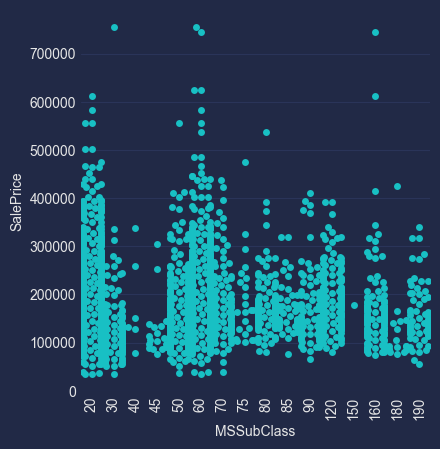

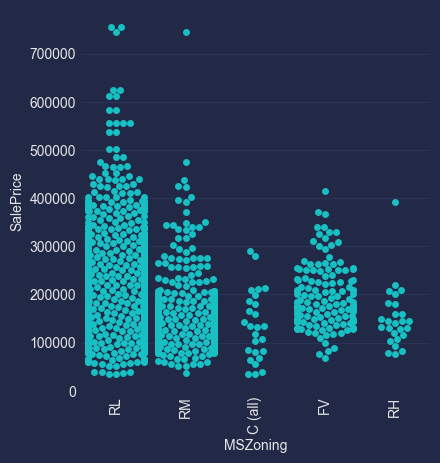

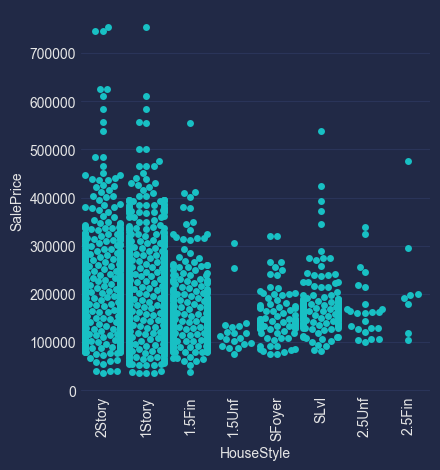

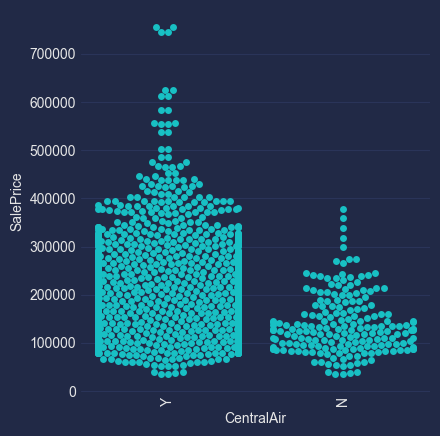

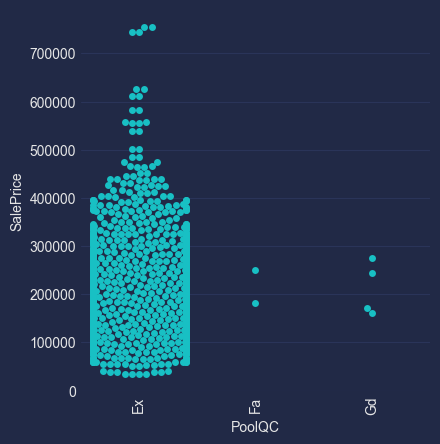

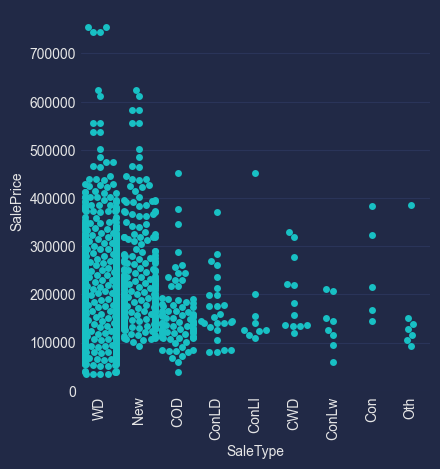

In [184]:
##Categorical variables versus “SalePrice”
# Check the sale price distribution by different types of variables
for element in ["MSSubClass", "MSZoning", "HouseStyle","CentralAir", "PoolQC", "SaleType"]:
    cat_plot = sns.catplot(y="SalePrice", x= element, kind="swarm", legend="full", data=combined_df, height=4.5, aspect=3 / 3,);
    cat_plot.set_xticklabels(rotation=90)

In [185]:
#Continuous variables versus “SalePrice”
# Check the sale price distribution by different types of variables
for element in ["1stFlrSF", "LotArea", "OverallQual", "OverallCond", "YearBuilt","ExterQual", "YrSold"]:
    re_plot = sns.relplot(y="SalePrice", x= element, legend="full", data=combined_df, height=4.5, aspect=3 / 3,);
    re_plot.set_xticklabels(rotation=90)

SyntaxError: invalid syntax (1052740560.py, line 1)

At a first look, continuous variable seem to be more or less correlated with the “SalePrice”, certainly the “OverallQual”, “YearBuilt” and surface of the house. When it comes to continuous variables, we can see that the “MSSubClass” and “Neighborhood” provide some insights into the “SalePrice”. We review that with a correlation matrix.

In [ ]:
# Correlation matrix
corr_mat = combined_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_mat, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

V. Data transformation
A last step building our models is transforming the data into a digestible format.

Generate dummies
An algorithm has no clues what a “SaleType” of “WD” means. Instead it understands if there is a 1 or 0 in the “SaleType_WD column.

In [186]:
#Get dummies for our data set
combined_df = pd.get_dummies(combined_df)

In [187]:
#Split data set into test and train
#We combined the train and test set into a

# Split the data set so to build our model
train_df = combined_df[combined_df["SalePrice"] > 0 ]
test_df = combined_df[combined_df["SalePrice"].isna() ]
test_df = test_df.drop(["SalePrice"], axis = 1)

# Create the X and y sets
X_train_df = train_df.drop(["SalePrice"], axis = 1)
y_train_df = train_df[["Id" ,"SalePrice"]]

Transform the skewed variables
Some important variable might not be normally distributed (Skew and Kurtosis). We can change that by applying a log transformation to the “SalePrice”.

Best practice would be to check for all variables. However, for the brevity of this tutorial, we just adjust the only monetary value of our model (monetary values are often not-normally distributed).

In [188]:
# Log transform the SalePrice as it is skewed
y_train_df["SalePrice"] = np.log1p(y_train_df["SalePrice"])

Set “Id” column as index
We do not want to use the “Id” column in our model. We still want to keep it for our predictions later.

In [189]:
# Set the ID col as index
for element in [X_train_df, y_train_df, test_df]:
    element.set_index('Id', inplace = True)

Scale the data
Most algorithms rely on the distance between the predicted value and real value in order to improve their predictions. It is thus best practice to scale our data so as to make sure that these distances are not impacted by the scale of a variable. E.g. errors from the surface of a house and its “OverallCond” don’t have the same scale at all.

We use RobustScaler() as we want to minimize the effect of outliers.

In [194]:
import RobustScaler
# Scale the data and use RobustScaler to minimize the effect of outliers
scaler = RobustScaler()

# Scale the X_train set
X_train_scaled = scaler.fit_transform(X_train_df.values)
X_train_df = pd.DataFrame(X_train_scaled, index = X_train_df.index, columns= X_train_df.columns)

# Scale the X_test set
X_test_scaled = scaler.transform(test_df.values)
X_test_df = pd.DataFrame(X_test_scaled, index = test_df.index, columns= test_df.columns)

ModuleNotFoundError: No module named 'RobustScaler'

In [196]:
# Split our training set into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.05, random_state=23)

In [201]:
from math import sqrt

In [202]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict using the trained model
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R^2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    RMSE=sqrt(mean_squared_error(y_test, y_pred))

    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        'Model': [model_name],
        'R^2 Score': [r2],
        'Mean Squared Error': [mse],
        'RMSE':[RMSE]
    })
    
    return result_df

# Assuming you have X_train, y_train, X_test, y_test ready

# Create instances of the models
random_forest = RandomForestRegressor(n_estimators=200, random_state=0)
gradient_boosting = GradientBoostingRegressor(n_estimators=200, random_state=0)

# Call the function for each model
results = pd.concat([
    evaluate_model(random_forest, 'Random Forest', X_train, y_train, X_test, y_test),
    evaluate_model(gradient_boosting, 'Gradient Boosting', X_train, y_train, X_test, y_test),
    
], ignore_index=True)

print(results)

               Model  R^2 Score  Mean Squared Error      RMSE
0      Random Forest   0.851523            0.032782  0.181059
1  Gradient Boosting   0.885861            0.025201  0.158747


In [206]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor instance with the best hyperparameters
best_model = GradientBoostingRegressor(n_estimators=200, random_state=0)

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Create predictions
predictions = np.exp(best_model.predict(test_df))
my_pred = pd.DataFrame({'Id': test_df.index, 'SalePrice': predictions})
my_pred

,Id,SalePrice
0,1461,125392.774447
1,1462,150975.767194
2,1463,187034.927676
3,1464,194302.940552
4,1465,186553.645979
...,...,...
1454,2915,76653.381988
1455,2916,77476.944750
1456,2917,140347.117044
1457,2918,119792.480728


In [209]:
my_pred.to_csv('sample_submission.csv', index=False)

🔘 **step 1 : Finding and cleaning null values**

In [143]:
train_df.select_dtypes(include='object').isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [144]:
test_df.select_dtypes(include='object').isna().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [145]:
train_df=train_df.drop("Id",axis=1)
train_df=train_df.drop("Alley",axis=1)
train_df=train_df.drop("PoolQC",axis=1)
train_df=train_df.drop("Fence",axis=1)
train_df=train_df.drop("MiscFeature",axis=1)

In [146]:
test_df=test_df.drop("Alley",axis=1)
test_df=test_df.drop("PoolQC",axis=1)
test_df=test_df.drop("Fence",axis=1)
test_df=test_df.drop("MiscFeature",axis=1)

In [147]:
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(2001)

In [148]:
### "Test" Numerical
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(test_df["LotFrontage"].mean())
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(test_df["MasVnrArea"].mean())
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(2001)
test_df["GarageCars"] = test_df["GarageCars"].fillna(0)
test_df["GarageArea"] = test_df["GarageArea"].fillna(test_df["GarageArea"].mean())
test_df["BsmtFullBath"] = test_df["BsmtFullBath"].fillna(0)
test_df["BsmtHalfBath"] = test_df["BsmtHalfBath"].fillna(0)
test_df["BsmtFinSF1"] = test_df["BsmtFinSF1"].fillna(test_df["BsmtFinSF1"].mean())
test_df["BsmtFinSF2"] = test_df["BsmtFinSF2"].fillna(test_df["BsmtFinSF2"].mean())
test_df["TotalBsmtSF"] = test_df["TotalBsmtSF"].fillna(test_df["TotalBsmtSF"].mean())
test_df["BsmtUnfSF"] = test_df["BsmtUnfSF"].fillna(test_df["BsmtUnfSF"].mean())

In [149]:
# Impute using a constant value
for column in [
    
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    
]:
    train_df[column] = train_df[column].fillna("no")

# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    train_df[column] = train_df[column].fillna(train_df[column].mode()[0])

In [150]:
# Impute using a constant value
for column in [

    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
]:
    test_df[column] = test_df[column].fillna("no")

# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    test_df[column] = test_df[column].fillna(test_df[column].mode()[0])

In [151]:
test_df.select_dtypes(include='object').isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [152]:
#for numerical features
train_df.select_dtypes(exclude='object').isna().sum()/train_df.shape[0]*100

MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
dtype: float64

In [153]:
#for numerical features
test_df.select_dtypes(exclude='object').isna().sum()/test_df.shape[0]*100

Id               0.0
MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
dtype: float64

this perccentage not higher so i will not delete the missing values

🔘 **step 2 : Delete duplicate data**

🔘 **step 3 : Feature Transformations**

Log Transform for Skewed Features

Cosine Transform for Cyclical Features

The cosine transform is commonly used to handle cyclical features, such as time-related or angular data. When you have data that cycles through a range of values (e.g., days of the week, months of the year, angles), the cosine transform can help in capturing the cyclical patterns without introducing discontinuities.



🔘 **step 4 : Encode Categoricals**

In [154]:
from sklearn.preprocessing import LabelEncoder
catagory_cols = ('MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','PavedDrive','SaleType','SaleCondition', "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "BsmtFinType1", "ExterQual")
for c in catagory_cols:
  le = LabelEncoder()
  train_df[c]= le.fit_transform(train_df[c].values)

In [155]:
from sklearn.preprocessing import LabelEncoder
catagory_cols = ('MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','PavedDrive','SaleType','SaleCondition', "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "BsmtFinType1", "ExterQual")
for c in catagory_cols:
  le = LabelEncoder()
  test_df[c]= le.fit_transform(test_df[c].values)

🔘 **step 4 : Scaling**

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_df = sc.fit_transform(train_df)
test_df = sc.transform(test_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Id


**target transformation**

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [ ]:
target.isnull().sum()

In [157]:
target = np.log(target)

🔘 **step 5 : Data correlations**

🔘 **step 5 : Data splitting**

<a id="8"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model building ⚙️</p>

In [158]:
y=target
X=train_df


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score
regressor.score(X_train, y_train)
regressor = round(regressor.score(X_train, y_train) * 100, 2)
regressor

98.18

In [162]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
from sklearn.metrics import accuracy_score
regressor.score(X_train, y_train)
regressor = round(regressor.score(X_train, y_train) * 100, 2)
regressor

98.18

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a RandomForestRegressor instance
regressor = RandomForestRegressor(n_estimators=200, random_state=0)

# Fit the regressor on the training data
regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the Mean Squared Error and R^2 score
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.021563573731094878
R^2 Score: 0.8844479546093219


In [164]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a GradientBoostingRegressor instance
regressor_gb = GradientBoostingRegressor(n_estimators=200, random_state=0)

# Fit the regressor on the training data
regressor_gb.fit(X_train, y_train)

# Predict using the trained model
y_pred_gb = regressor_gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the Mean Squared Error and R^2 score for Gradient Boosting Regressor
print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("R^2 Score (Gradient Boosting):", r2_gb)

Mean Squared Error (Gradient Boosting): 0.0196298379095542
R^2 Score (Gradient Boosting): 0.8948102040309953


In [165]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create a SVR instance
regressor_svm = SVR(kernel='linear')

# Fit the regressor on the training data
regressor_svm.fit(X_train, y_train)

# Predict using the trained model
y_pred_svm = regressor_svm.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print the Mean Squared Error and R^2 score for Support Vector Machine
print("Mean Squared Error (Support Vector Machine):", mse_svm)
print("R^2 Score (Support Vector Machine):", r2_svm)

Mean Squared Error (Support Vector Machine): 0.019914955135106403
R^2 Score (Support Vector Machine): 0.8932823553079813


In [166]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict using the trained model
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R^2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        'Model': [model_name],
        'R^2 Score': [r2],
        'Mean Squared Error': [mse]
    })
    
    return result_df

# Assuming you have X_train, y_train, X_test, y_test ready

# Create instances of the models
random_forest = RandomForestRegressor(n_estimators=200, random_state=0)
gradient_boosting = GradientBoostingRegressor(n_estimators=200, random_state=0)
svm_regressor = SVR(kernel='linear')

# Call the function for each model
results = pd.concat([
    evaluate_model(random_forest, 'Random Forest', X_train, y_train, X_test, y_test),
    evaluate_model(gradient_boosting, 'Gradient Boosting', X_train, y_train, X_test, y_test),
    evaluate_model(svm_regressor, 'Support Vector Machine', X_train, y_train, X_test, y_test)
], ignore_index=True)

print(results)

                    Model  R^2 Score  Mean Squared Error
0           Random Forest   0.884448            0.021564
1       Gradient Boosting   0.894810            0.019630
2  Support Vector Machine   0.893282            0.019915


In [167]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor instance with the best hyperparameters
best_model = GradientBoostingRegressor(n_estimators=200, random_state=0)

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict the target values for test_df using the best model
predicted_target = best_model.predict(test_df)

# Print the predicted target values
print(predicted_target)

ValueError: X has 76 features, but GradientBoostingRegressor is expecting 75 features as input.

In [168]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor instance with the best hyperparameters
best_model = GradientBoostingRegressor(n_estimators=200, random_state=0)

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict the target values for test_df using the best model
predicted_target = best_model.predict(test_df)

# Create a DataFrame with the 'id' column from test_df and the predicted target values
result_df = pd.DataFrame({'id': test['id'], 'predicted_target': predicted_target})

# Print the resulting DataFrame
print(result_df)



ValueError: X has 76 features, but GradientBoostingRegressor is expecting 75 features as input.

In [ ]:
test_df.shape

In [ ]:
test_df.shape

In [ ]:
X_train